In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
# Download stop words list and punkt tokenizer (if not previously downloaded)
nltk.download('stopwords')
nltk.download('punkt')
!pip install gensim
!pip install pyLDAvis
!pip install wordcloud matplotlib

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.0 MB/s eta 0:00:00


#loding data

In [2]:
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
!wget -P data/full_dataset/ https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_3.csv


--2024-11-12 10:52:28--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_1.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 209.85.145.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14174600 (14M) [application/octet-stream]
Saving to: ‘data/full_dataset/goemotions_1.csv’

goemotions_1.csv    100%[===================>]  13.52M  --.-KB/s    in 0.1s    

2024-11-12 10:52:28 (109 MB/s) - ‘data/full_dataset/goemotions_1.csv’ saved [14174600/14174600]

--2024-11-12 10:52:28--  https://storage.googleapis.com/gresearch/goemotions/data/full_dataset/goemotions_2.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.207, 209.85.145.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.207|:443... connected.
HTTP request sent, awaiting 

In [9]:
goemotions_1 = pd.read_csv('data/full_dataset/goemotions_1.csv')
goemotions_2 = pd.read_csv('data/full_dataset/goemotions_2.csv')
goemotions_3 = pd.read_csv('data/full_dataset/goemotions_3.csv')

# איחוד הקבצים
combined_df = pd.concat([goemotions_1, goemotions_2, goemotions_3], ignore_index=True)
emotion_columns = combined_df.columns[9:]
# שמירה לקובץ חדש
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s', errors='coerce')
combined_df.to_csv('data/full_dataset/goemotions_combined.csv', index=False)

###text: The text of the comment (with masked tokens, as described in the paper).
###id: The unique id of the comment.
###author: The Reddit username of the comment's author.
###subreddit: The subreddit that the comment belongs to.
###link_id: The link id of the comment.
###parent_id: The parent id of the comment.
###created_utc: The timestamp of the comment.
###rater_id: The unique id of the annotator.
###example_very_unclear: Whether the annotator marked the example as being very ###unclear or difficult to label (in this case they did not choose any emotion labels).
###separate columns representing each of the emotion categories, with binary labels (0 or 1)

#General analysis


In [13]:
missing_values = combined_df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
text                    0
id                      0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
desire                  0
disappointment          0
disapproval             0
disgust                 0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
neutral                 0
day_of_

In [14]:
unique_counts = combined_df.nunique()
print("Unique counts for each column:")
print(unique_counts)

Unique counts for each column:
text                    57732
id                      58011
author                  49178
subreddit                 483
link_id                 44897
parent_id               54924
created_utc             57257
rater_id                   82
example_very_unclear        2
admiration                  2
amusement                   2
anger                       2
annoyance                   2
approval                    2
caring                      2
confusion                   2
curiosity                   2
desire                      2
disappointment              2
disapproval                 2
disgust                     2
embarrassment               2
excitement                  2
fear                        2
gratitude                   2
grief                       2
joy                         2
love                        2
nervousness                 2
optimism                    2
pride                       2
realization                 2
relief   

In [15]:
emotion_counts = combined_df[emotion_columns].sum()
emotion_counts

,0
admiration,17131
amusement,9245
anger,8084
annoyance,13618
approval,17620
caring,5999
confusion,7359
curiosity,9692
desire,3817
disappointment,8469


In [36]:
overall_emotions_avg = combined_df[emotion_columns].mean()
overall_emotions_avg.sum()

1.1813421706710854

#column analysis


##id


In [ ]:
rater_counts = combined_df.groupby('id')[emotion_columns].agg(lambda x: x.sum() > 0).sum(axis=1)


In [131]:


def more_emotom(num):
  more_than_two_raters = rater_counts[rater_counts > num]

  tagged_emotions = combined_df.groupby('id')[emotion_columns].sum()

  print(f"Comments rated by more than two raters and their tagged emotions: {len(more_than_two_raters)}")
  for comment_id in more_than_two_raters.index:
      emotions_tagged = tagged_emotions.loc[comment_id]

      tagged = emotions_tagged[emotions_tagged > 0].index.tolist()

      print(f"emotin more>{num} Comment ID: {comment_id}, Number of Raters: {more_than_two_raters[comment_id]}, Tagged Emotions: {tagged}")
more_emotom(10)

Comments rated by more than two raters and their tagged emotions: 8
emotin more>10 Comment ID: edelx9y, Number of Raters: 13, Tagged Emotions: ['admiration', 'approval', 'curiosity', 'disappointment', 'embarrassment', 'fear', 'gratitude', 'nervousness', 'optimism', 'pride', 'realization', 'remorse', 'neutral']
emotin more>10 Comment ID: edgmob1, Number of Raters: 13, Tagged Emotions: ['admiration', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'disappointment', 'disapproval', 'disgust', 'fear', 'gratitude', 'nervousness', 'sadness']
emotin more>10 Comment ID: ednuw9i, Number of Raters: 11, Tagged Emotions: ['curiosity', 'embarrassment', 'gratitude', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'remorse', 'sadness', 'neutral']
emotin more>10 Comment ID: edzetty, Number of Raters: 11, Tagged Emotions: ['admiration', 'anger', 'caring', 'curiosity', 'disgust', 'embarrassment', 'nervousness', 'realization', 'remorse', 'sadness', 'neutral']
emotin more>10 Comment ID: ee6ewou

In [126]:
rater_counts = combined_df.groupby('id')[emotion_columns].agg(lambda x: x.sum() > 0).sum(axis=1)

more_than_two_raters = rater_counts[rater_counts > 2]

tagged_emotions = combined_df.groupby('id')[emotion_columns].sum()

results = []

for comment_id in more_than_two_raters.index:
    emotions_tagged = tagged_emotions.loc[comment_id]

    tagged = emotions_tagged[emotions_tagged > 0].index.tolist()

    comment_text = combined_df.loc[combined_df['id'] == comment_id, 'text'].values[0]

    results.append({
        'Comment ID': comment_id,
        'Number of Raters': more_than_two_raters[comment_id],
        'Tagged Emotions': tagged,
        'Comment Text': comment_text
    })

results_df = pd.DataFrame(results)

print("Comments rated by more than two raters and their tagged emotions:")
print(results_df)


KeyboardInterrupt: 

##created_utc

In [123]:
(combined_df['created_utc'].min(),combined_df['created_utc'].max())

(Timestamp('2019-01-01 00:00:19'), Timestamp('2019-01-31 23:59:36'))

Frequency of comments by day of the week:
day_of_week
0    27295
1    34716
2    35196
3    35772
4    27793
5    25557
6    24896
Name: author, dtype: int64

Frequency of comments by hour of the day:
hour_of_day
0     10894
1     11543
2     11703
3     10623
4      9438
5      7919
6      6428
7      5268
8      4690
9      4291
10     4235
11     4504
12     5483
13     6689
14     8178
15     9663
16    10715
17    11099
18    11708
19    11417
20    11890
21    11481
22    10886
23    10480
Name: author, dtype: int64

Frequency of comments by day of the month:
day_of_month
1     5735
2     6324
3     6767
4     6609
5     6481
6     6682
7     7267
8     6856
9     7210
10    7060
11    6844
12    6437
13    6280
14    6571
15    7307
16    7203
17    7280
18    7180
19    6165
20    6321
21    6801
22    7321
23    7079
24    7398
25    7160
26    6474
27    5613
28    6656
29    7497
30    7380
31    7267
Name: author, dtype: int64


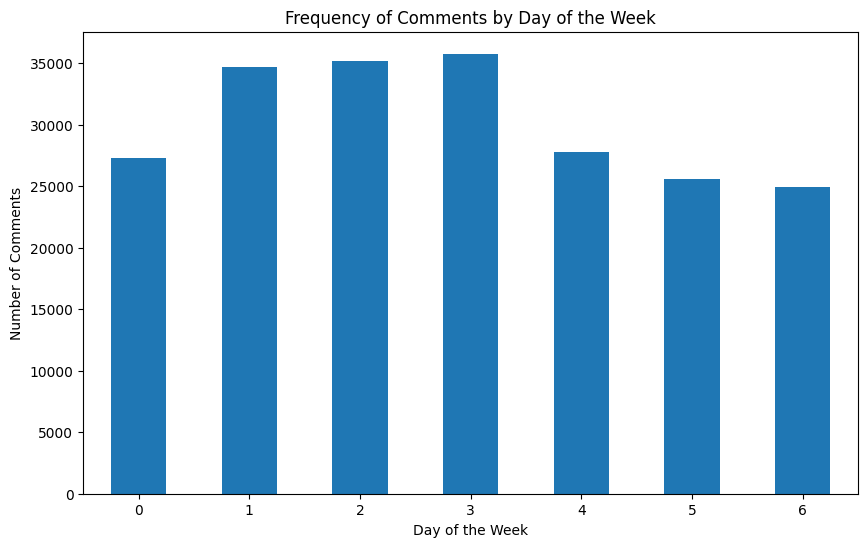

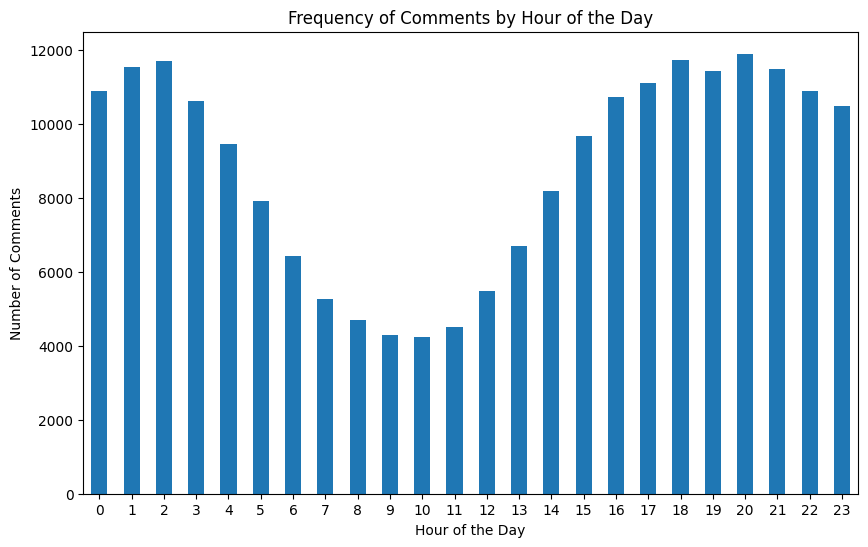

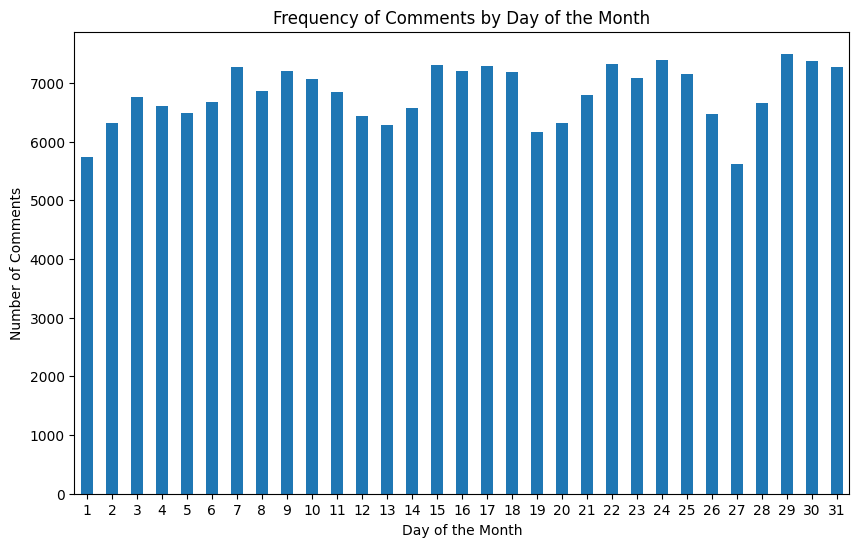

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'created_utc' column to datetime format (if not already in datetime format)
combined_df['created_utc'] = pd.to_datetime(combined_df['created_utc'], unit='s')

# Extract day of the week (0 = Sunday, 6 = Saturday)
combined_df['day_of_week'] = combined_df['created_utc'].dt.dayofweek

# Extract hour of the day (0-23)
combined_df['hour_of_day'] = combined_df['created_utc'].dt.hour

# Calculate the frequency of comments for each day of the week
day_of_week_frequency = combined_df.groupby('day_of_week')['author'].count()

# Calculate the frequency of comments for each hour of the day
hour_of_day_frequency = combined_df.groupby('hour_of_day')['author'].count()

combined_df['day_of_month'] = combined_df['created_utc'].dt.day

# Calculate the frequency of comments for each day of the month
day_of_month_frequency = combined_df.groupby('day_of_month')['author'].count()
# Display the results
print("Frequency of comments by day of the week:")
print(day_of_week_frequency)

print("\nFrequency of comments by hour of the day:")
print(hour_of_day_frequency)

# Display the results
print("\nFrequency of comments by day of the month:")
print(day_of_month_frequency)

# Plot frequency of comments by day of the week
plt.figure(figsize=(10, 6))
day_of_week_frequency.plot(kind='bar')
plt.title("Frequency of Comments by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

# Plot frequency of comments by hour of the day
plt.figure(figsize=(10, 6))
hour_of_day_frequency.plot(kind='bar')
plt.title("Frequency of Comments by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()


plt.figure(figsize=(10, 6))
day_of_month_frequency.plot(kind='bar')
plt.title("Frequency of Comments by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.show()

In [40]:
total_avg = user_emotions.sum().sum() / user_emotions.size
total_avg

0.18121416080361136

##author

In [16]:
author_counts = combined_df['author'].value_counts()
print("Author counts:\n", author_counts)

Author counts:
 author
[deleted]          3882
CakeDay--Bot         96
devildriver77        74
Ahren_with_an_h      57
saturdeity           57
                   ... 
MooksDMD              1
nivekious             1
Diarrhea_Dragon       1
plantstand            1
BBuobigos             1
Name: count, Length: 49178, dtype: int64


In [28]:
user_emotions = combined_df.groupby('author')[emotion_columns].sum()
def get_user_emotions(user):
    if user in user_emotions.index:
        user_1 = user_emotions.loc[user]
        exceeding_emotions = (user_1 > overall_emotions_avg).sum()
        print(f"All emotions for {user}: {user_1.sum()}")
        print(f"Number of emotions exceeding the average: {exceeding_emotions}")
        return user_1
    else:
        return f"User {user} not found in the data."

# Calling the function for the user '[deleted]'
print(get_user_emotions('[deleted]'))


All emotions for [deleted]: 4601
Number of emotions exceeding the average: 28
admiration        274
amusement         168
anger             161
annoyance         269
approval          355
caring            121
confusion         142
curiosity         197
desire             64
disappointment    142
disapproval       232
disgust           129
embarrassment      40
excitement         73
fear               71
gratitude         228
grief               6
joy               132
love              150
nervousness        32
optimism          149
pride              30
realization       152
relief             15
remorse            54
sadness           128
surprise           94
neutral           993
Name: [deleted], dtype: int64


In [50]:
def Use_emotional_abuse(num):
  user_comparison = user_emotions > overall_emotions_avg
  user_comparison_count = user_comparison.sum(axis=1)
  users_above = user_comparison_count[user_comparison_count >= num]
  return users_above

[49177, 42693, 27116, 17197, 9556, 4621, 2348, 1273, 750, 441, 261, 167, 106, 60, 36, 23, 17, 11, 5, 2, 1, 1, 1, 1, 1, 1, 1]


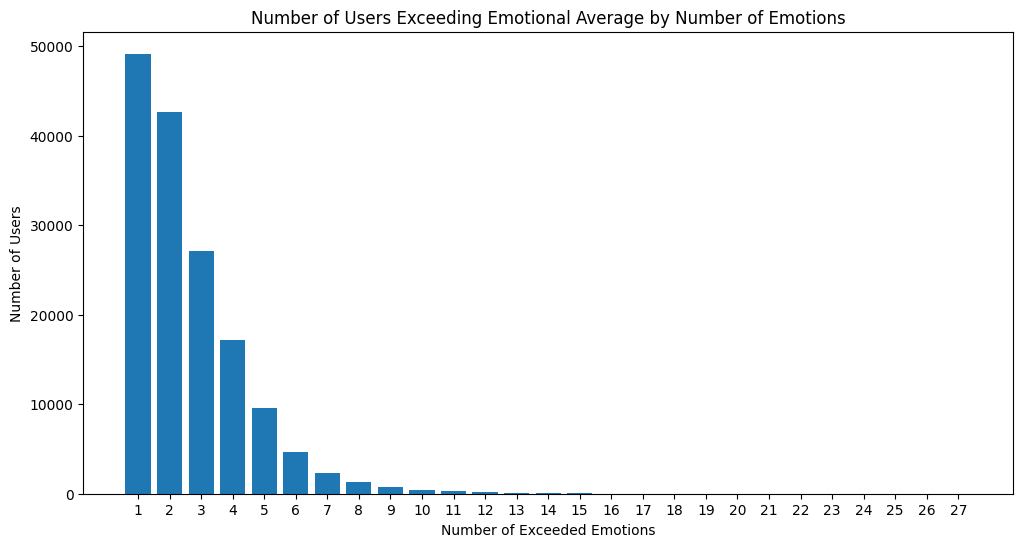

In [51]:
count_per_num = []

# Loop through each number from 1 to 27 and get the count of users who exceed that many emotions
for i in range(1, 28):
    count_per_num.append(len(Use_emotional_abuse(i)))

print(count_per_num)
# Plotting the results
plt.figure(figsize=(12, 6))
plt.bar(range(1, 28), count_per_num)
plt.title("Number of Users Exceeding Emotional Average by Number of Emotions")
plt.xlabel("Number of Exceeded Emotions")
plt.ylabel("Number of Users")
plt.xticks(range(1, 28))
plt.show()

In [87]:
def count_raters_above_emotion_threshold(emotion, percent):
    if emotion not in user_emotions.columns:
        return f"Emotion '{emotion}' not found in the data."

    total_tags_per_rater = user_emotions.sum(axis=1)

    emotion_percent_per_rater = (user_emotions[emotion] / total_tags_per_rater) * 100

    raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]

    return list(raters_above_threshold.index)
emotion = 'anger'
percent = 100
print(f"Number of raters tagging '{emotion}' above {percent}%: {len(count_raters_above_emotion_threshold(emotion, percent))} {count_raters_above_emotion_threshold(emotion, percent)}  ")


Number of raters tagging 'anger' above 100%: 108 ['0lightheavyweight0', '1GREG7_YT', '4inchsurprise', 'BRADSOMMERS', 'Boomer8450', 'Chris-P', 'CleanestBirb', 'ColHaberdasher', 'DeathByUnicornn', 'DeliciousTidePod', 'Ebenezer-Grim', 'Eliju', 'FOX_SMOLDER', 'FYourTeam', 'FjolnirFimbulvetr', 'Ganjidog', 'GoodMoleman2You', 'HelloMyNameIsRuben', 'Hugh_Gekok', 'Hungry_Coyotes', 'IDoNotAgreeWithYou', 'JACK9310', 'JamesTheKid', 'JohnRyanMurphyIsGOD', 'KapiTod', 'LackingBrainForName', 'M2Dazas', 'Machineplanett', 'MaidenMB', 'Mead76', 'MimicTMI', 'PM_ME_UR_BOOOOTY', 'Popeworm', 'PrecisionChemist', 'Rabbit-Punch', 'ReeeeeBB', 'RockyB95', 'Sataris', 'Schmoopyeh', 'Shtruntz', 'Skore_Smogon', 'Slime_Hina', 'SomeRandomDude821', 'StranzVanWaldenberg', 'Supreme0Ruler', 'TehEpikNuwbie', 'Thatniqqarylan', 'TheLoathesomeRich', 'Tkldsphincter', 'Tofo_nofo', 'Willie_is_King', 'WumpaGames', 'YoshiHD', 'YouEvenCarve', 'Z0idberg_MD', '_pixelheart', 'airoderinde', 'apakras1', 'babycatcherlady', 'beat_tapes', '

## rater_id

In [ ]:
emotion_by_rater = combined_df.groupby('rater_id')[emotion_columns].sum()


In [116]:
rater_dfs = {}

for rater_id, rater_df in combined_df.groupby('rater_id'):
    rater_dfs[rater_id] = rater_df

for rater_id, rater_df in rater_dfs.items():
    num_records = len(rater_df)
    print(f"Data for rater ID '{rater_id}' with {num_records} records:")


    emotion_counts = {emotion: (rater_df[emotion] == 1).sum() for emotion in emotion_columns}

    for emotion, count in emotion_counts.items():
        print(f"Number of occurrences of emotion '{emotion}': {count}")

    emotion_percentages = {}
    for emotion in emotion_columns:
        if num_records > 0:
            emotion_percentages[emotion] = (emotion_counts[emotion] / num_records) * 100
        else:
            emotion_percentages[emotion] = 0

    for emotion, percentage in emotion_percentages.items():
        print(f"Percentage of '{emotion}': {percentage:.2f}%")

    print("\n")



Data for rater ID '0' with 49 records:
Number of occurrences of emotion 'admiration': 0
Number of occurrences of emotion 'amusement': 3
Number of occurrences of emotion 'anger': 3
Number of occurrences of emotion 'annoyance': 3
Number of occurrences of emotion 'approval': 0
Number of occurrences of emotion 'caring': 2
Number of occurrences of emotion 'confusion': 0
Number of occurrences of emotion 'curiosity': 0
Number of occurrences of emotion 'desire': 1
Number of occurrences of emotion 'disappointment': 1
Number of occurrences of emotion 'disapproval': 0
Number of occurrences of emotion 'disgust': 4
Number of occurrences of emotion 'embarrassment': 0
Number of occurrences of emotion 'excitement': 5
Number of occurrences of emotion 'fear': 3
Number of occurrences of emotion 'gratitude': 1
Number of occurrences of emotion 'grief': 0
Number of occurrences of emotion 'joy': 6
Number of occurrences of emotion 'love': 4
Number of occurrences of emotion 'nervousness': 0
Number of occurrenc

NameError: name 'rater_analysis' is not defined

    rater_id  num_records  admiration  amusement     anger  annoyance  \
0          0           49    0.000000   6.122449  6.122449   6.122449   
1          1         1605    3.613707   5.545171  7.476636   3.862928   
2          2         5778    8.445829   2.197992  5.417099   5.607477   
3          3         3767    6.928590   3.902310  1.353862   3.504115   
4          4        10508    8.079558   6.433194  4.615531   6.832889   
..       ...          ...         ...        ...       ...        ...   
77        77          936    3.739316   4.487179  2.243590  19.444444   
78        78         1872    9.241453   3.685897  4.113248  11.164530   
79        79          834   13.788969   2.757794  5.155875  16.187050   
80        80           86    8.139535   1.162791  5.813953   3.488372   
81        81         5271   12.635174   4.477329  4.686018   3.357997   

     approval    caring  confusion  curiosity  ...       love  nervousness  \
0    0.000000  4.081633   0.000000   0.000000

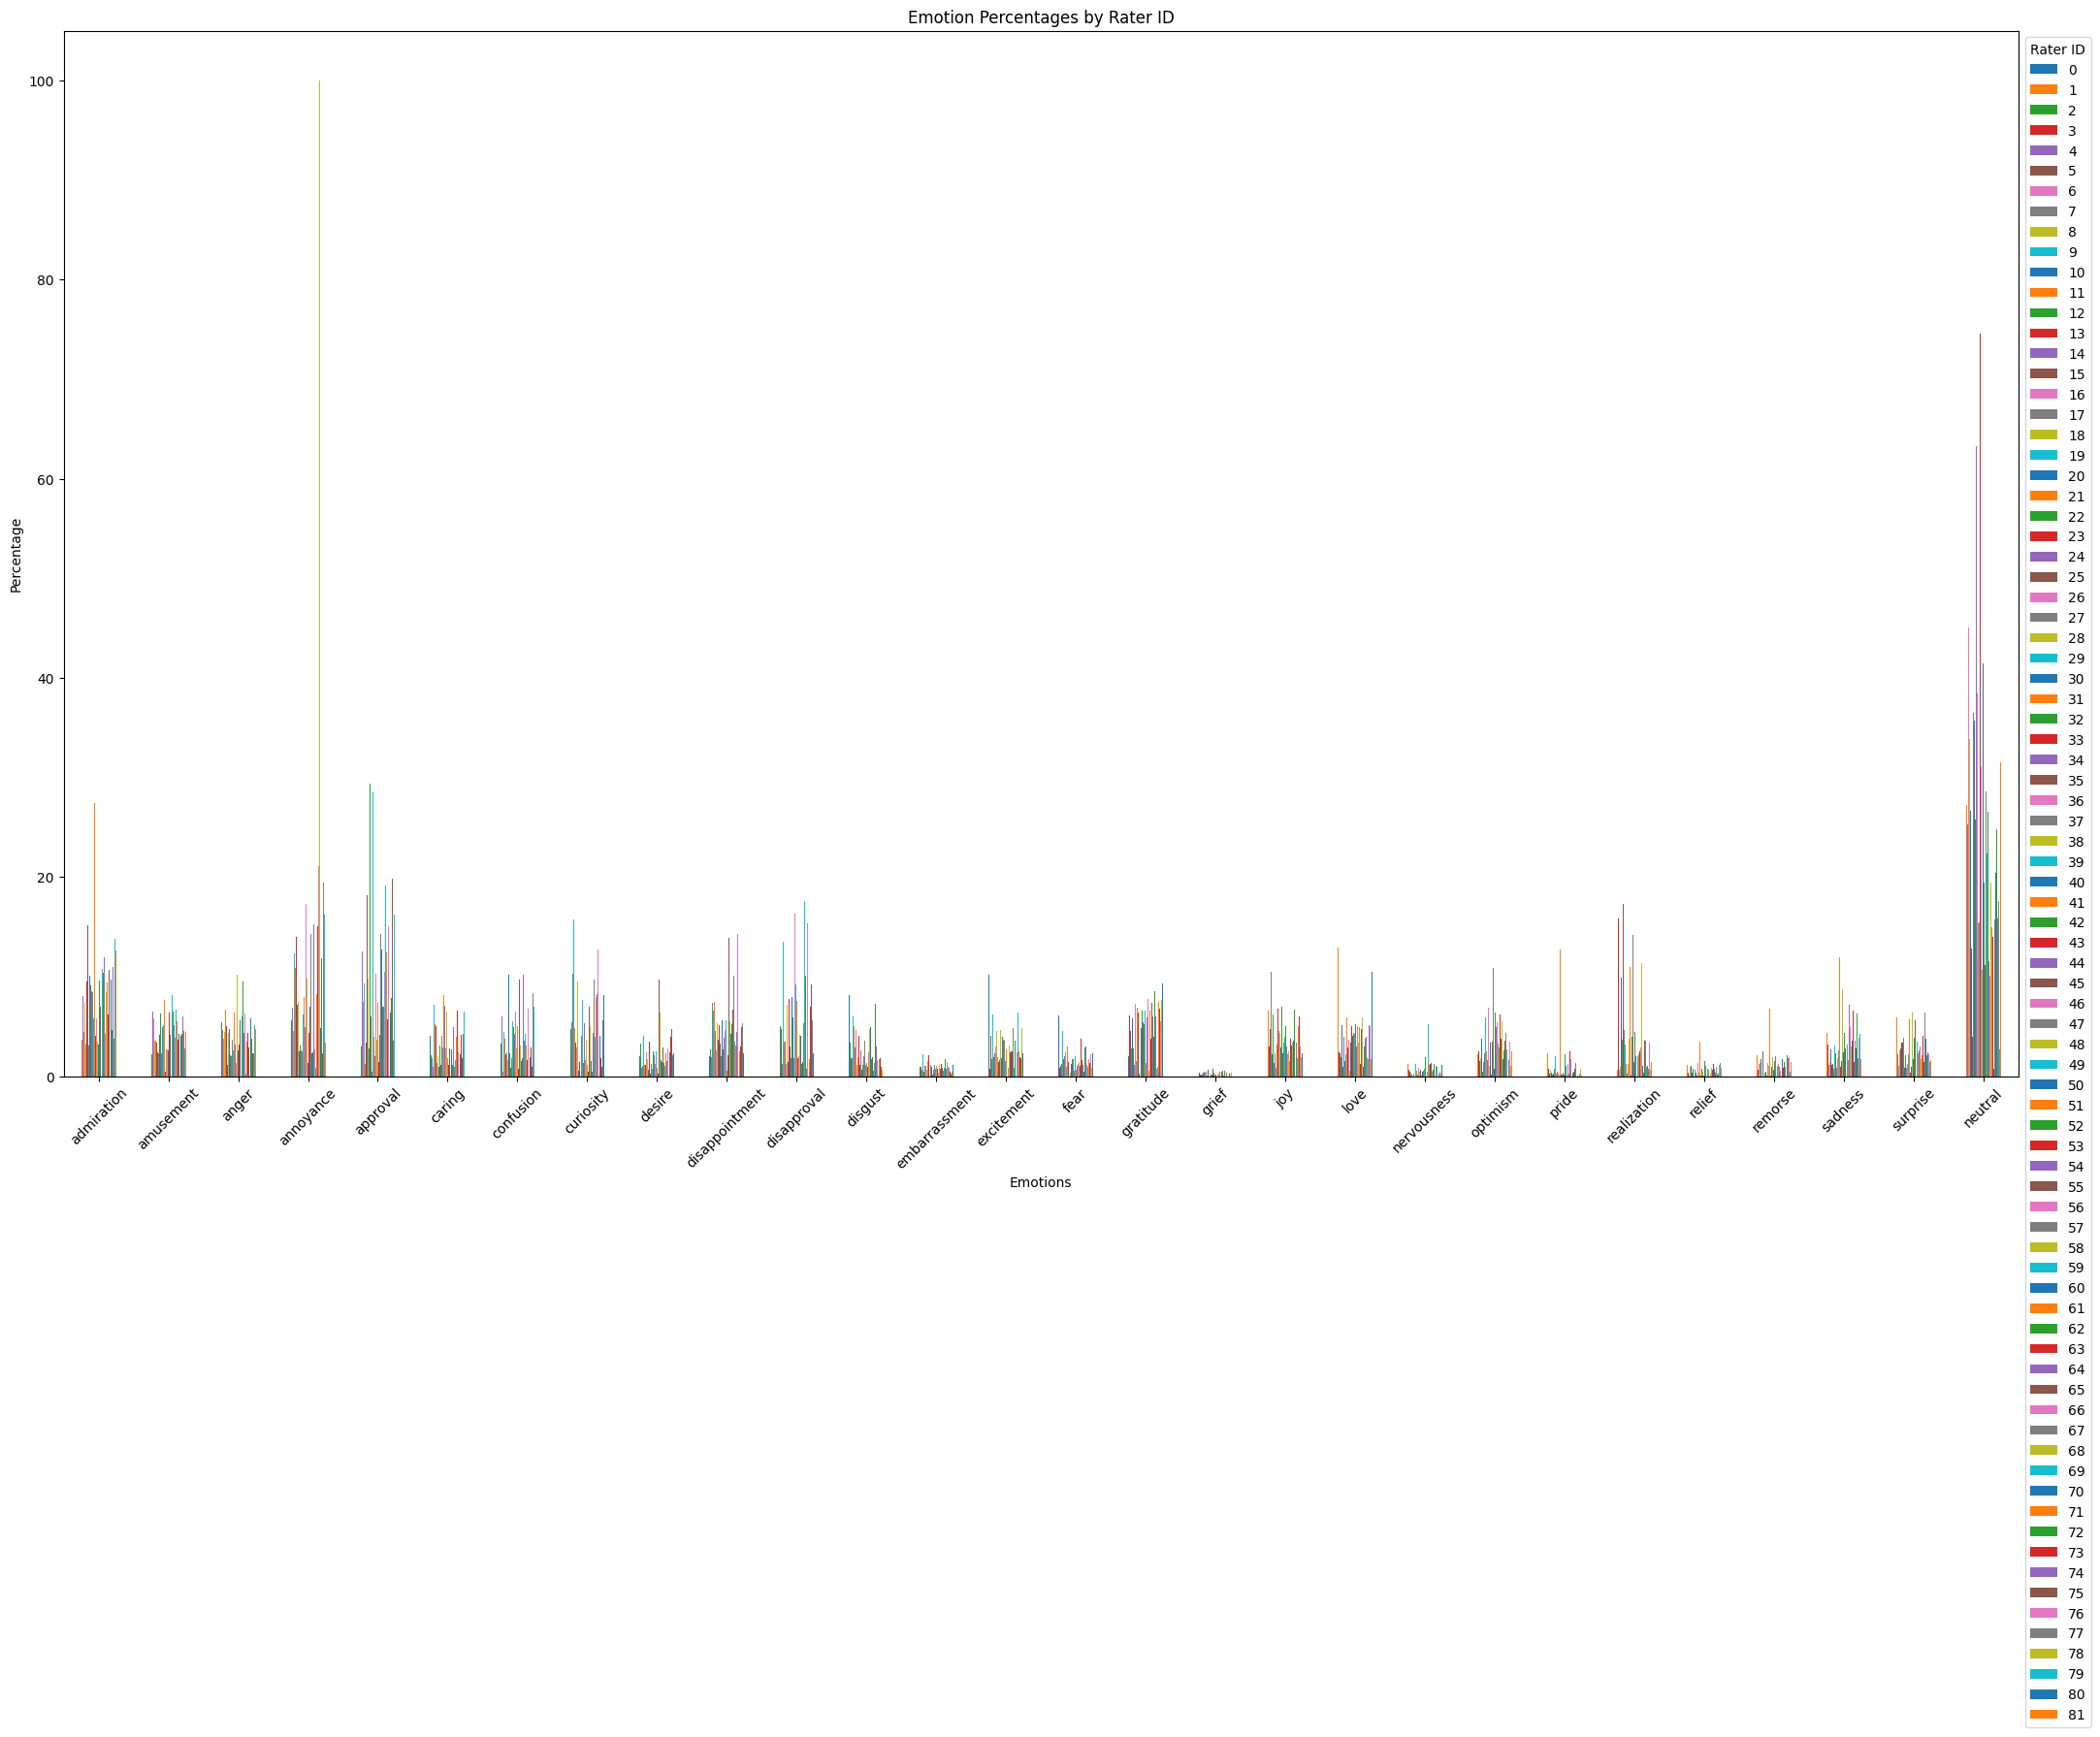

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

rater_dfs = {}

for rater_id, rater_df in combined_df.groupby('rater_id'):
    rater_dfs[rater_id] = rater_df

rater_analysis = []

for rater_id, rater_df in rater_dfs.items():
    num_records = len(rater_df)

    emotion_counts = {emotion: (rater_df[emotion] == 1).sum() for emotion in emotion_columns}

    emotion_percentages = {}
    for emotion in emotion_columns:
        emotion_percentages[emotion] = (emotion_counts[emotion] / num_records) * 100 if num_records > 0 else 0

    rater_analysis.append({
        'rater_id': rater_id,
        'num_records': num_records,
        **emotion_percentages
    })

analysis_df = pd.DataFrame(rater_analysis)

print(analysis_df)

analysis_df.set_index('rater_id')[emotion_columns].T.plot(kind='bar', figsize=(26, 14))

plt.title('Emotion Percentages by Rater ID')
plt.xlabel('Emotions')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

plt.legend(title='Rater ID', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

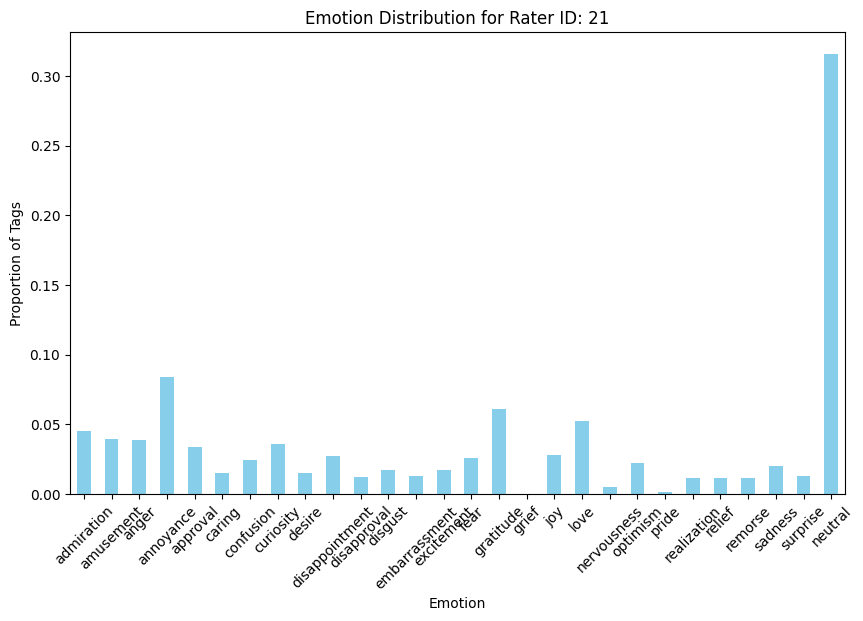

Emotion Distribution for example_rater_id:
admiration        0.045165
amusement         0.039709
anger             0.039103
annoyance         0.083662
approval          0.033647
caring            0.015156
confusion         0.024553
curiosity         0.036072
desire            0.015156
disappointment    0.027584
disapproval       0.012428
disgust           0.016975
embarrassment     0.013337
excitement        0.017278
fear              0.026069
gratitude         0.060928
grief             0.000303
joy               0.028190
love              0.052440
nervousness       0.004850
optimism          0.022431
pride             0.001819
realization       0.011216
relief            0.011216
remorse           0.011822
sadness           0.020006
surprise          0.013337
neutral           0.315550
Name: 21, dtype: float64
Total Tags by example_rater_id: 3299


In [70]:
def get_rater_emotion_distribution(rater_id):
    if rater_id not in emotion_by_rater.index:
        return f"Rater ID {rater_id} not found in the data."

    rater_emotions = emotion_by_rater.loc[rater_id]

    total_tags = rater_emotions.sum()

    emotion_distribution = rater_emotions / total_tags

    plt.figure(figsize=(10, 6))
    emotion_distribution.plot(kind='bar', color='skyblue')
    plt.title(f"Emotion Distribution for Rater ID: {rater_id}")
    plt.xlabel("Emotion")
    plt.ylabel("Proportion of Tags")
    plt.xticks(rotation=45)
    plt.show()

    return emotion_distribution, total_tags

rater_id = 'example_rater_id'
emotion_distribution, total_tags = get_rater_emotion_distribution(21)
print(f"Emotion Distribution for {rater_id}:\n{emotion_distribution}")
print(f"Total Tags by {rater_id}: {total_tags}")


In [80]:
def count_raters_above_emotion_threshold(emotion, percent):
    if emotion not in emotion_by_rater.columns:
        return f"Emotion '{emotion}' not found in the data."

    total_tags_per_rater = emotion_by_rater.sum(axis=1)

    emotion_percent_per_rater = (emotion_by_rater[emotion] / total_tags_per_rater) * 100

    raters_above_threshold = emotion_percent_per_rater[emotion_percent_per_rater >= percent]

    return list(raters_above_threshold.index)
emotion = 'neutral'
percent = 10
print(f"Number of raters tagging '{emotion}' above {percent}%: {count_raters_above_emotion_threshold(emotion, percent)}")


Number of raters tagging 'neutral' above 10%: [0, 1, 2, 4, 5, 6, 7, 8, 10, 12, 13, 14, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 46, 47, 49, 50, 51, 52, 53, 55, 57, 58, 59, 60, 61, 62, 63, 64, 67, 69, 70, 71, 72, 74, 75, 76, 77, 78, 80, 81]


## link_id

Top 10 link_ids by comment count:
link_id
t3_ae6ejj    92
t3_ahcnq2    90
t3_aju3fu    88
t3_af265z    88
t3_ac00wo    80
t3_ab9b3d    78
t3_ad6u9x    78
t3_afp0p6    75
t3_alc8zn    68
t3_aku1y5    68
Name: count, dtype: int64


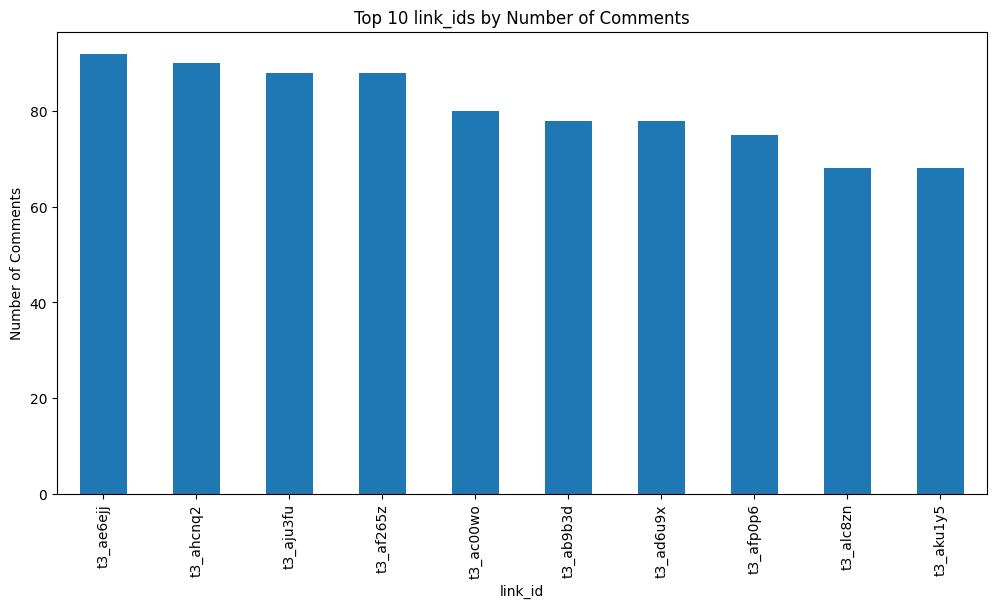

In [95]:
link_comment_count = combined_df['link_id'].value_counts()

print("Top 10 link_ids by comment count:")
print(link_comment_count.head(10))

plt.figure(figsize=(12, 6))
link_comment_count.head(10).plot(kind='bar')
plt.title("Top 10 link_ids by Number of Comments")
plt.xlabel("link_id")
plt.ylabel("Number of Comments")
plt.show()

##parent_id

Top 10 parent_ids by reply count:
parent_id
t3_ae6ejj    64
t3_ac00wo    53
t3_ad6u9x    53
t3_af265z    43
t3_akcogh    41
t3_ag2gyj    39
t3_ajjeub    39
t3_ajvzzd    37
t3_acov7p    37
t3_ag15m6    37
Name: count, dtype: int64


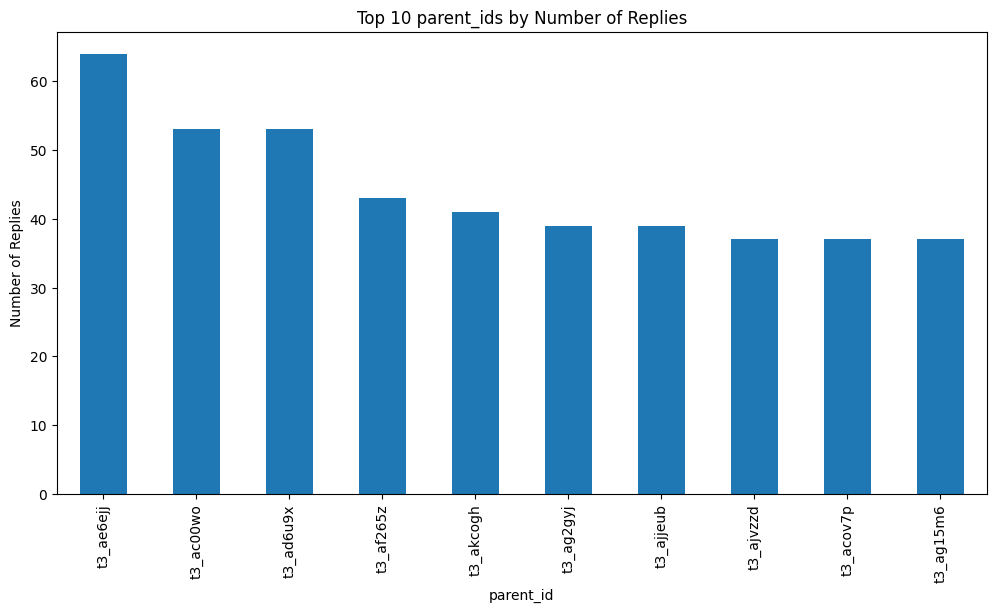

In [96]:
parent_comment_count = combined_df['parent_id'].value_counts()

print("Top 10 parent_ids by reply count:")
print(parent_comment_count.head(10))

plt.figure(figsize=(12, 6))
parent_comment_count.head(10).plot(kind='bar')
plt.title("Top 10 parent_ids by Number of Replies")
plt.xlabel("parent_id")
plt.ylabel("Number of Replies")
plt.show()


In [97]:
link_parent_count = combined_df.groupby(['link_id', 'parent_id']).size().reset_index(name='reply_count')

print("Top 10 link_id and parent_id combinations by reply count:")
print(link_parent_count.sort_values(by='reply_count', ascending=False).head(10))


Top 10 link_id and parent_id combinations by reply count:
         link_id  parent_id  reply_count
15503  t3_ae6ejj  t3_ae6ejj           64
10358  t3_ad6u9x  t3_ad6u9x           53
4309   t3_ac00wo  t3_ac00wo           53
20281  t3_af265z  t3_af265z           43
47491  t3_akcogh  t3_akcogh           41
43374  t3_ajjeub  t3_ajjeub           39
25268  t3_ag2gyj  t3_ag2gyj           39
7781   t3_acov7p  t3_acov7p           37
45244  t3_ajvzzd  t3_ajvzzd           37
25059  t3_ag15m6  t3_ag15m6           37


In [99]:
linked_comments_df = combined_df[combined_df['parent_id'].isin(combined_df['link_id'].unique())]


Sum of emotions in linked comments:
86624
admiration         8373
amusement          3311
anger              3672
annoyance          5492
approval           6197
caring             2745
confusion          2699
curiosity          3947
desire             1803
disappointment     3562
disapproval        4000
disgust            2395
embarrassment       971
excitement         2787
fear               1423
gratitude          2846
grief               316
joy                3708
love               4275
nervousness         818
optimism           3636
pride               582
realization        3292
relief              588
remorse             865
sadness            3039
surprise           2476
neutral           22369
dtype: int64


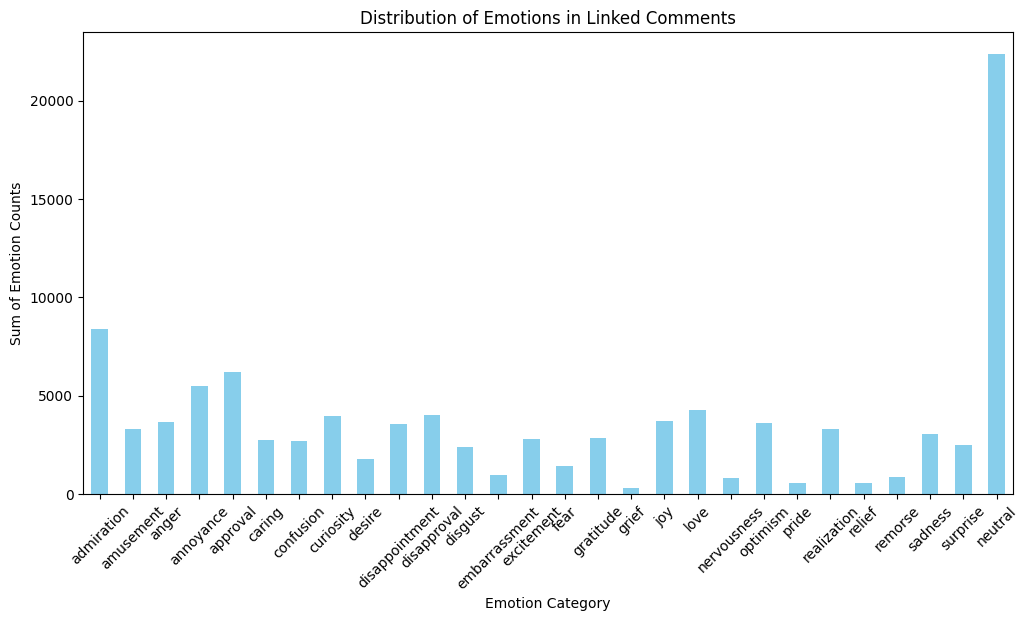

In [104]:
emotion_sums = linked_comments_df[emotion_columns].sum()

print("Sum of emotions in linked comments:")
print(len(linked_comments_df))
print(emotion_sums)

plt.figure(figsize=(12, 6))
emotion_sums.plot(kind='bar', color='skyblue')
plt.title("Distribution of Emotions in Linked Comments")
plt.xlabel("Emotion Category")
plt.ylabel("Sum of Emotion Counts")
plt.xticks(rotation=45)
plt.show()


<ipython-input-105-f4b448276287>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_comments_df['hour_of_day'] = linked_comments_df['created_utc'].dt.hour


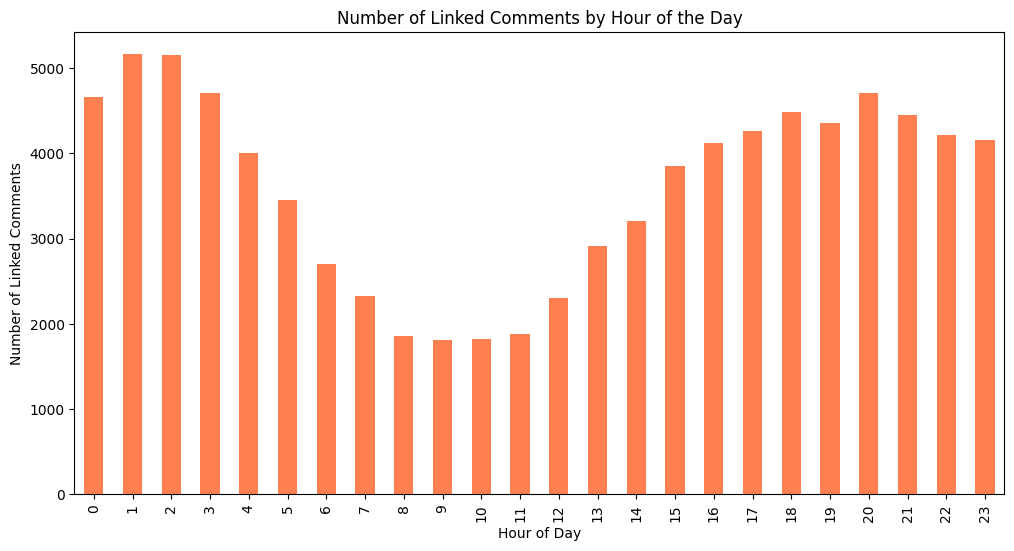

In [105]:
linked_comments_df['hour_of_day'] = linked_comments_df['created_utc'].dt.hour

hourly_comment_count = linked_comments_df['hour_of_day'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_comment_count.plot(kind='bar', color='coral')
plt.title("Number of Linked Comments by Hour of the Day")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Linked Comments")
plt.show()


<ipython-input-106-0d53aaa0a96a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linked_comments_df['day_of_week'] = linked_comments_df['created_utc'].dt.dayofweek


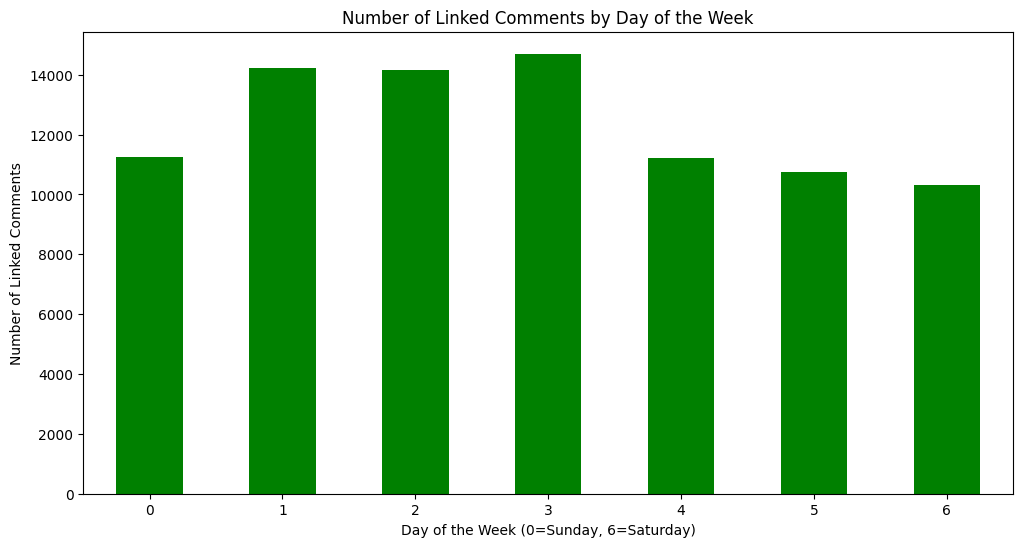

In [106]:
linked_comments_df['day_of_week'] = linked_comments_df['created_utc'].dt.dayofweek

daily_comment_count = linked_comments_df['day_of_week'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
daily_comment_count.plot(kind='bar', color='green')
plt.title("Number of Linked Comments by Day of the Week")
plt.xlabel("Day of the Week (0=Sunday, 6=Saturday)")
plt.ylabel("Number of Linked Comments")
plt.xticks(rotation=0)
plt.show()


In [108]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

for _, row in linked_comments_df.iterrows():
    parent_id = row['parent_id']
    comment_id = row['id']

    G.add_edge(parent_id, comment_id)

plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, k=0.1)
nx.draw(G, pos, with_labels=True, node_size=20, node_color="skyblue", edge_color="gray", font_size=8, alpha=0.7)
plt.title("Comment Network Graph")
plt.show()


KeyboardInterrupt: 

<Figure size 1200x1200 with 0 Axes>

##subreddit

In [113]:
subreddit_dfs = {}

for subreddit, group in combined_df.groupby('subreddit'):
    subreddit_dfs[subreddit] = group.reset_index(drop=True)  # מאחסן את ה-DataFrame של כל subreddit

for subreddit, subreddit_df in subreddit_dfs.items():
    num_records = len(subreddit_df)
    print(f"Data for subreddit '{subreddit}': with {num_records} records:")

    emotion_counts = {emotion: (subreddit_df[emotion] == 1).sum() for emotion in emotion_columns}

    num_records = len(subreddit_df)

    for emotion, count in emotion_counts.items():
        print(f"Number of occurrences of emotion '{emotion}': {count}")

    emotion_percentages = {}
    for emotion in emotion_columns:
        if num_records > 0:
            emotion_percentages[emotion] = (emotion_counts[emotion] / num_records) * 100
        else:
            emotion_percentages[emotion] = 0

    for emotion, percentage in emotion_percentages.items():
        print(f"Percentage of '{emotion}': {percentage:.2f}%")

    print("\n")

Streaming output truncated to the last 5000 lines.
Number of occurrences of emotion 'fear': 4
Number of occurrences of emotion 'gratitude': 58
Number of occurrences of emotion 'grief': 1
Number of occurrences of emotion 'joy': 37
Number of occurrences of emotion 'love': 38
Number of occurrences of emotion 'nervousness': 3
Number of occurrences of emotion 'optimism': 28
Number of occurrences of emotion 'pride': 0
Number of occurrences of emotion 'realization': 23
Number of occurrences of emotion 'relief': 1
Number of occurrences of emotion 'remorse': 13
Number of occurrences of emotion 'sadness': 16
Number of occurrences of emotion 'surprise': 6
Number of occurrences of emotion 'neutral': 108
Percentage of 'admiration': 9.45%
Percentage of 'amusement': 4.41%
Percentage of 'anger': 1.89%
Percentage of 'annoyance': 3.78%
Percentage of 'approval': 9.87%
Percentage of 'caring': 3.15%
Percentage of 'confusion': 3.36%
Percentage of 'curiosity': 4.41%
Percentage of 'desire': 2.31%
Percentage o

<ipython-input-109-48abe3f73e69>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data[date_column] = pd.to_datetime(subreddit_data[date_column])


Average emotions for subreddit politics:
admiration        0.060606
amusement         0.028520
anger             0.044563
annoyance         0.071301
approval          0.090909
caring            0.016043
confusion         0.040998
curiosity         0.065954
desire            0.016043
disappointment    0.028520
disapproval       0.062389
disgust           0.032086
embarrassment     0.005348
excitement        0.021390
fear              0.033868
gratitude         0.028520
grief             0.000000
joy               0.014260
love              0.017825
nervousness       0.017825
optimism          0.040998
pride             0.007130
realization       0.069519
relief            0.005348
remorse           0.007130
sadness           0.023173
surprise          0.030303
neutral           0.319073
dtype: float64



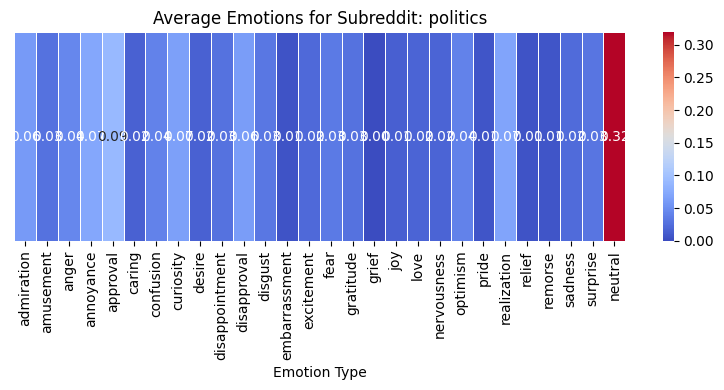

<ipython-input-109-48abe3f73e69>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subreddit_data['date'] = subreddit_data[date_column].dt.date


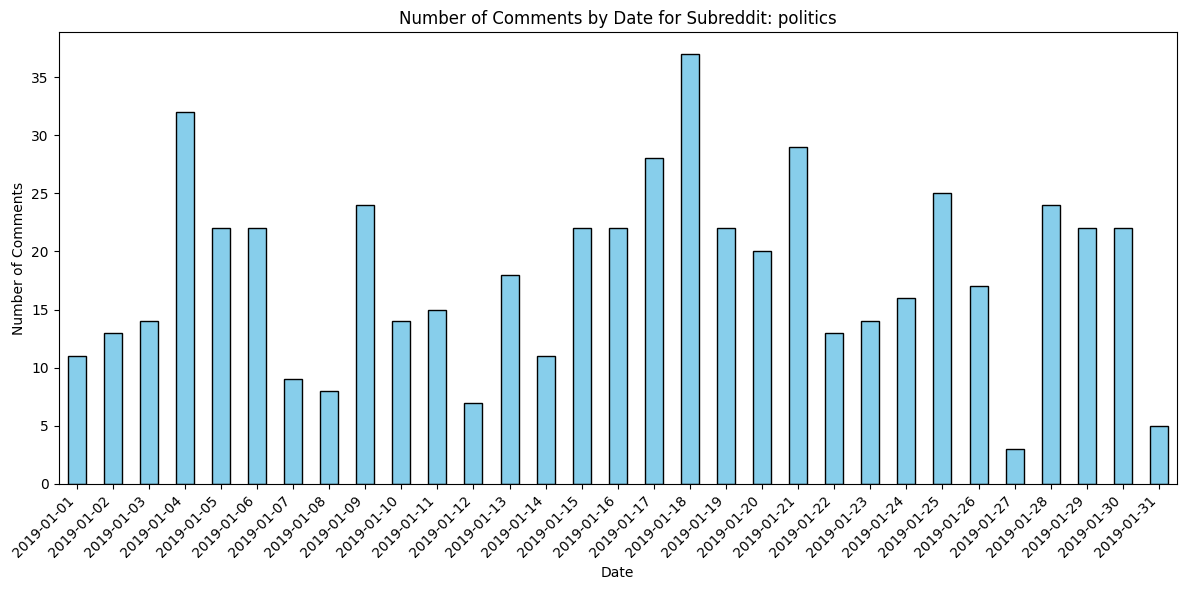

In [109]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def analyze_subreddit_stats(subreddit_name, status_df, emotion_columns, date_column='timestamp'):
    subreddit_data = status_df[status_df['subreddit'] == subreddit_name]

    if subreddit_data.empty:
        print(f"No data found for subreddit: {subreddit_name}")
        return

    subreddit_data[date_column] = pd.to_datetime(subreddit_data[date_column])

    emotion_means = subreddit_data[emotion_columns].mean()
    print(f"Average emotions for subreddit {subreddit_name}:\n{emotion_means}\n")

    plt.figure(figsize=(8, 4))
    sns.heatmap(emotion_means.to_frame().T, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
    plt.title(f"Average Emotions for Subreddit: {subreddit_name}")
    plt.xlabel("Emotion Type")
    plt.yticks([])
    plt.tight_layout()
    plt.show()

    subreddit_data['date'] = subreddit_data[date_column].dt.date
    comments_by_date = subreddit_data['date'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    comments_by_date.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Number of Comments by Date for Subreddit: {subreddit_name}")
    plt.xlabel("Date")
    plt.ylabel("Number of Comments")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


subreddit_name = 'politics'
analyze_subreddit_stats(subreddit_name, combined_df, emotion_columns, date_column='created_utc')

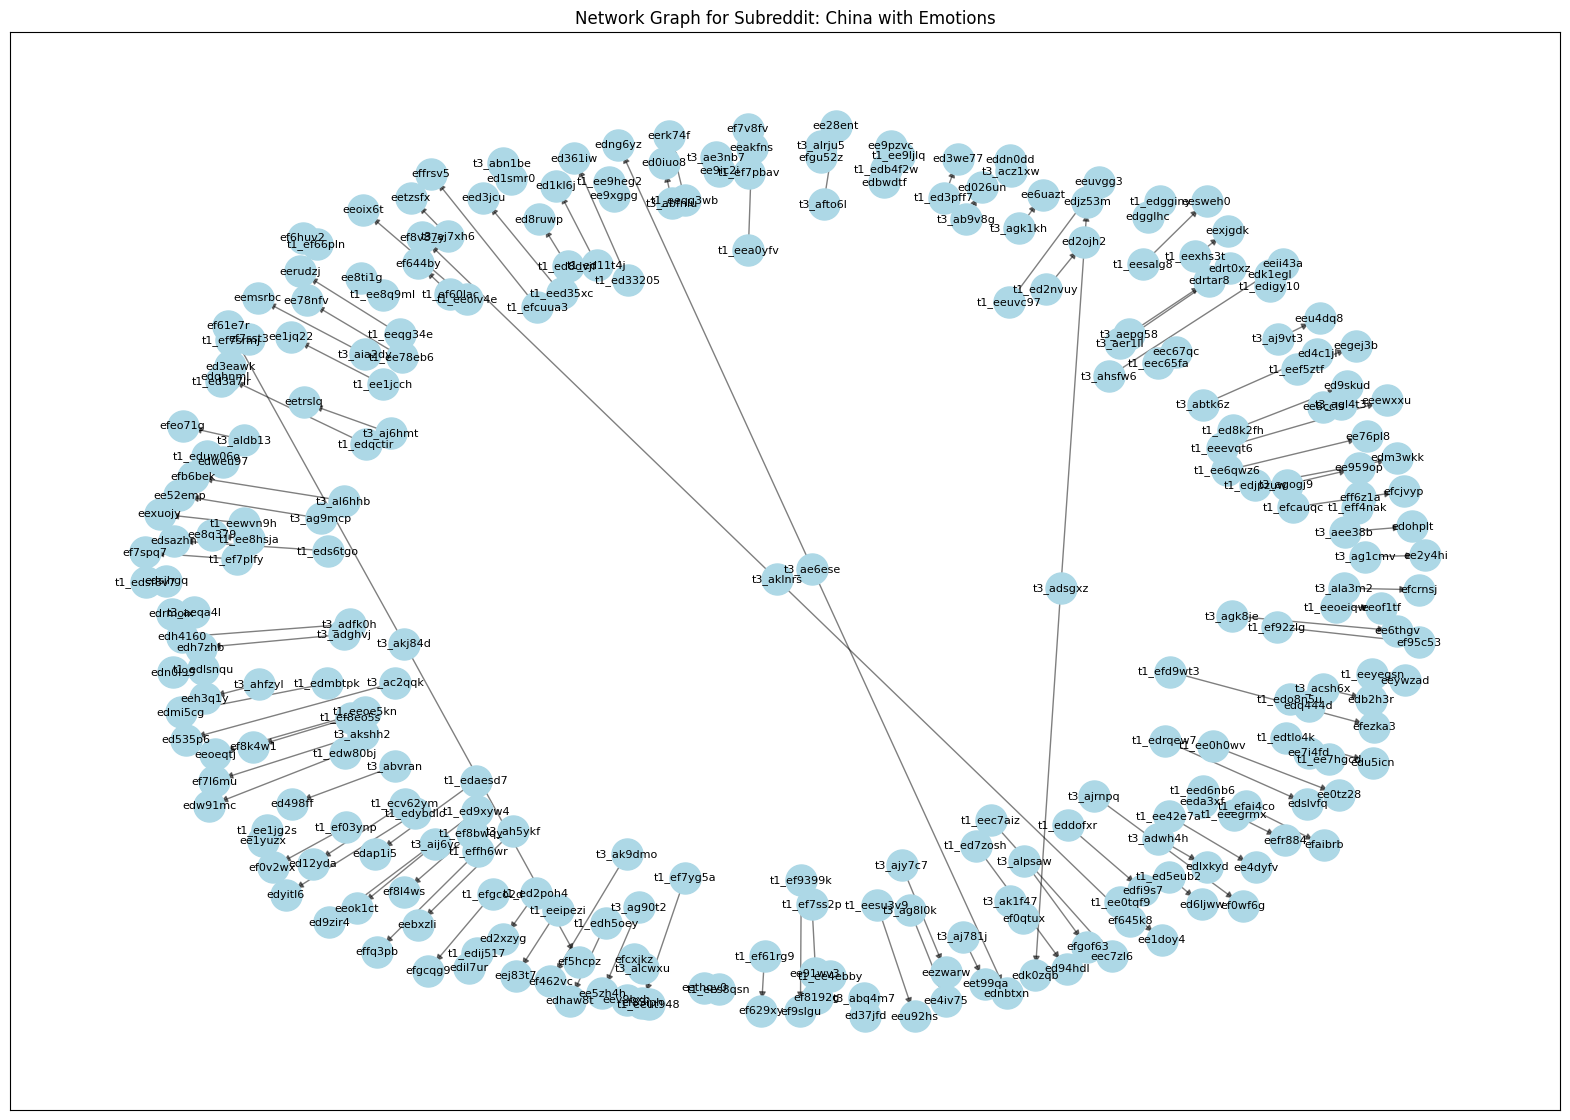

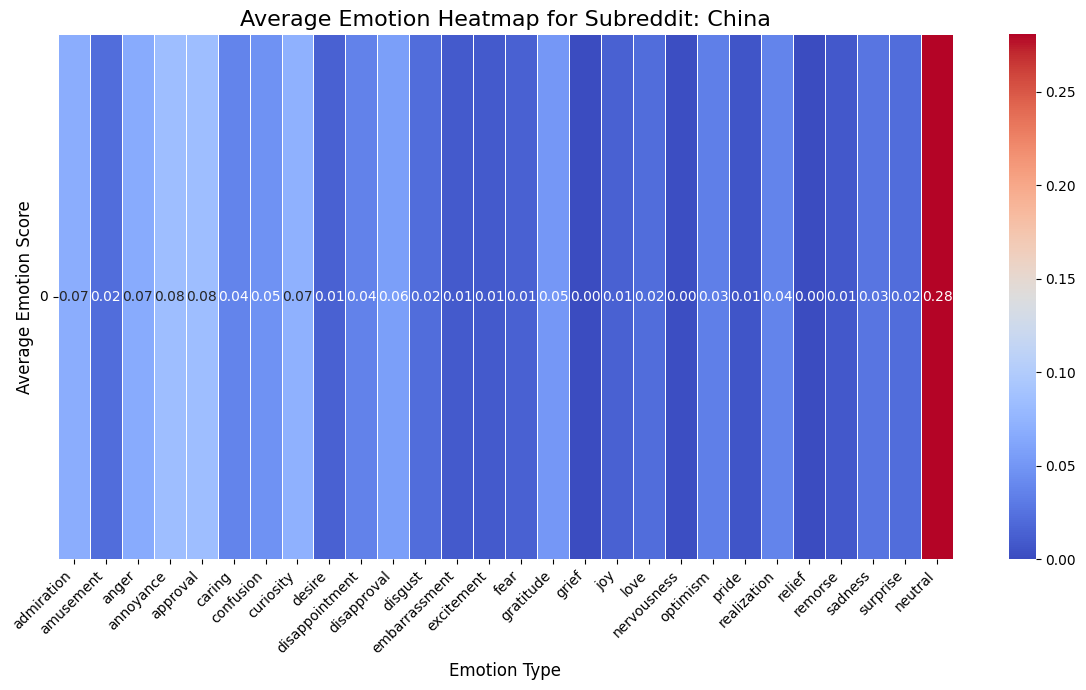

In [110]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
import pandas as pd

def build_network_graph_for_subreddit(subreddit_name, combined_df, emotion_columns):
    # Filter the dataframe by the specified subreddit
    subreddit_data = combined_df[combined_df['subreddit'] == subreddit_name]

    if subreddit_data.empty:
        print(f"No data found for subreddit: {subreddit_name}")
        return

    # Create a directed graph using networkx
    G = nx.DiGraph()

    # Add nodes for each comment
    for index, comment in subreddit_data.iterrows():
        comment_id = comment['id']
        author = comment['author']
        text = comment['text']

        # Get emotion data for the comment
        comment_emotions = comment[emotion_columns].mean()  # Calculate the mean emotions for the comment

        # Add node with emotion data
        G.add_node(comment_id, author=author, text=text, emotions=comment_emotions)

        # If the comment has a parent (is a reply), add an edge to the parent
        parent_id = comment['parent_id']
        if pd.notnull(parent_id) and parent_id != comment_id:
            G.add_edge(parent_id, comment_id)

    # Plotting the graph
    plt.figure(figsize=(20, 14))
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

    # Display the graph title
    plt.title(f"Network Graph for Subreddit: {subreddit_name} with Emotions")
    plt.show()
def analyze_subreddit_emotions(subreddit_name, combined_df, emotion_columns):
    # Filter the dataframe by the specified subreddit
    subreddit_data = combined_df[combined_df['subreddit'] == subreddit_name]

    if subreddit_data.empty:
        print(f"No data found for subreddit: {subreddit_name}")
        return

    # Calculate the mean emotion values for each emotion type within the subreddit
    subreddit_emotions = subreddit_data[emotion_columns].mean()

    # Reshape the data for heatmap plotting
    emotion_df = subreddit_emotions.to_frame().T  # Convert to DataFrame and transpose for proper plotting

    # Plot the emotion heatmap
    plt.figure(figsize=(12, 7))
    sns.heatmap(emotion_df, cmap='coolwarm', annot=True, fmt=".2f", cbar=True, linewidths=0.5)
    plt.title(f"Average Emotion Heatmap for Subreddit: {subreddit_name}", fontsize=16)
    plt.xlabel("Emotion Type", fontsize=12)
    plt.ylabel("Average Emotion Score", fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


# Example usage:
subreddit_name = 'China'  # Replace with the subreddit you want to analyze

# Build and display the network graph with emotions for the subreddit
build_network_graph_for_subreddit(subreddit_name, combined_df, emotion_columns)

# Analyze and display the emotions for the subreddit
analyze_subreddit_emotions(subreddit_name, combined_df, emotion_columns)

In [ ]:
import pandas as pd

def build_comment_status_dict(combined_df):
    # Create an empty dictionary to store the statuses
    status_dict = {}

    # Loop over all rows in the dataframe
    for idx, row in combined_df.iterrows():
        comment_id = row['id']
        parent_id = row['parent_id']
        link_id = row['link_id']
        comment_author = row['author']
        comment_text = row['text']
        subreddit = row['subreddit']  # Assuming 'subreddit' column exists in your dataframe

        # If parent_id is NaN, use link_id as the status key
        status_key = parent_id if pd.notnull(parent_id) else link_id

        # Initialize the key in the dictionary if it doesn't exist yet
        if status_key not in status_dict:
            status_dict[status_key] = {
                'comments': [],
                'subreddits': set()  # To store unique subreddits for each status
            }

        # Append the comment to the list of comments for that parent_id or link_id
        status_dict[status_key]['comments'].append({
            'comment_id': comment_id,
            'author': comment_author,
            'text': comment_text
        })

        # Add the subreddit to the set for that status
        status_dict[status_key]['subreddits'].add(subreddit)

    return status_dict

def count_comments_by_status(status_dict):
    # Count the number of comments for each status and get the associated subreddits
    comment_counts = {}
    for status_key, data in status_dict.items():
        comment_counts[status_key] = {
            'count': len(data['comments']),
            'subreddits': list(data['subreddits'])  # List of unique subreddits for each status
        }

    return comment_counts

# Example usage:
# Assuming `combined_df` is your dataframe
status_dict = build_comment_status_dict(combined_df)

# Count the comments for each status along with subreddits
comment_counts = count_comments_by_status(status_dict)

# Print out the number of comments and subreddits for each status
for status_key, data in comment_counts.items():
    subreddits_str = ', '.join(data['subreddits']) if data['subreddits'] else 'No subreddits'
    print(f"Status {status_key} has {data['count']} comments. Subreddits: {subreddits_str}")


In [91]:
status_dict

{'t1_eew18eq': {'comments': [{'comment_id': 'eew5j0j',
    'author': 'Brdd9',
    'text': 'That game hurt.'},
   {'comment_id': 'eew5j0j', 'author': 'Brdd9', 'text': 'That game hurt.'},
   {'comment_id': 'eew5j0j', 'author': 'Brdd9', 'text': 'That game hurt.'},
   {'comment_id': 'eew5j0j', 'author': 'Brdd9', 'text': 'That game hurt.'},
   {'comment_id': 'eew5j0j', 'author': 'Brdd9', 'text': 'That game hurt.'}],
  'subreddits': {'nrl'}},
 't3_ai4q37': {'comments': [{'comment_id': 'eemcysk',
    'author': 'TheGreen888',
    'text': ' >sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping" '},
   {'comment_id': 'eemcysk',
    'author': 'TheGreen888',
    'text': ' >sexuality shouldn’t be a grouping category It makes you different from othet ppl so imo it fits the definition of "grouping" '},
   {'comment_id': 'eemcysk',
    'author': 'TheGreen888',
    'text': ' >sexuality shouldn’t be a grouping category It makes you d

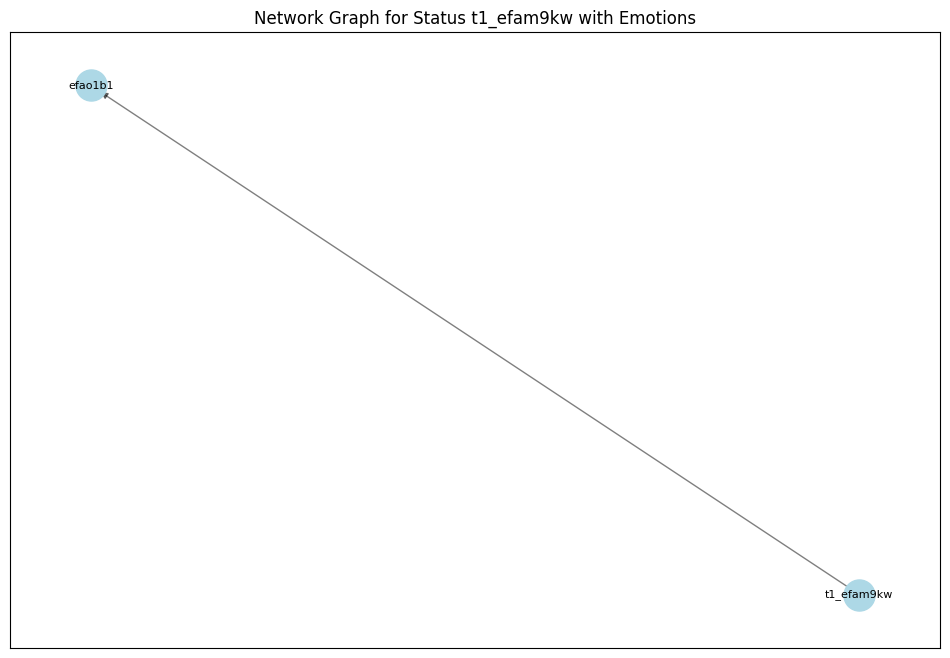

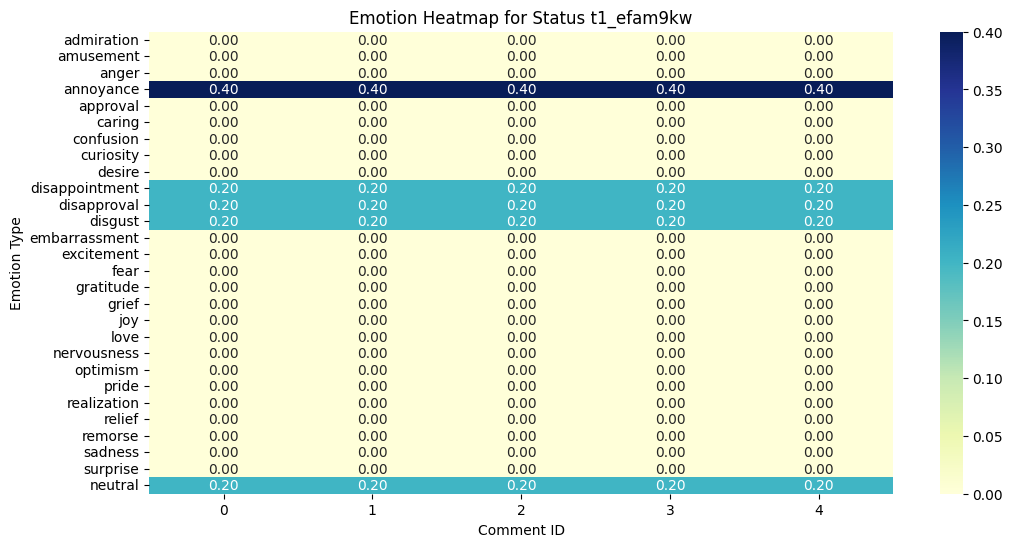

In [92]:
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

def build_network_graph_for_status(status_key, status_dict, emotion_columns):
    # Create a directed graph using networkx
    G = nx.DiGraph()

    # Get the data for the status
    comments_data = status_dict.get(status_key, {}).get('comments', [])

    if not comments_data:
        print(f"No comments found for status {status_key}")
        return

    # Add nodes to the graph (one for each comment)
    for comment in comments_data:
        comment_id = comment['comment_id']
        author = comment['author']
        text = comment['text']

        # Add node with emotion data
        # Assuming you have emotion columns in the DataFrame
        comment_emotions = combined_df[combined_df['id'] == comment_id][emotion_columns].mean().to_dict()

        # Add node with emotion data
        G.add_node(comment_id, author=author, text=text, emotions=comment_emotions)

        # If the comment has a parent (is a reply), add an edge to the parent
        parent_id = combined_df[combined_df['id'] == comment_id]['parent_id'].values[0]
        if pd.notnull(parent_id):
            G.add_edge(parent_id, comment_id)

    # Plotting the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, seed=42)  # Layout for positioning nodes

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

    # Adding edge labels for emotions (optional)
    edge_labels = nx.get_edge_attributes(G, 'emotion')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

    plt.title(f"Network Graph for Status {status_key} with Emotions")
    plt.show()

def analyze_status_emotions(status_key, status_dict, emotion_columns):
    # Retrieve the comments associated with the status
    comments_data = status_dict.get(status_key, {}).get('comments', [])

    if not comments_data:
        print(f"No comments found for status {status_key}")
        return

    # For each comment, analyze the emotions
    emotion_data = []
    for comment in comments_data:
        comment_id = comment['comment_id']
        comment_emotions = combined_df[combined_df['id'] == comment_id][emotion_columns].mean().to_dict()

        # Add emotions data for this comment
        emotion_data.append(comment_emotions)

    # Convert the emotion data into a DataFrame for easy analysis
    emotion_df = pd.DataFrame(emotion_data)

    # Plot a heatmap of emotions
    plt.figure(figsize=(12, 6))
    sns.heatmap(emotion_df.T, cmap='YlGnBu', annot=True, fmt=".2f", cbar=True)
    plt.title(f"Emotion Heatmap for Status {status_key}")
    plt.xlabel("Comment ID")
    plt.ylabel("Emotion Type")
    plt.show()

# Example usage:
# Assuming `status_dict` is the dictionary of statuses built earlier
status_key = 't1_efam9kw'  # Replace with the status you want to analyze

# Build and display the network graph with emotions
build_network_graph_for_status(status_key, status_dict, emotion_columns)

# Analyze and display the emotions for this status
analyze_status_emotions(status_key, status_dict, emotion_columns)


In [111]:
import pandas as pd

def convert_status_dict_to_dataframe(status_dict, emotion_columns, combined_df):
    # Lists to hold the data for each column in the DataFrame
    comments_list = []
    subreddits_list = []
    emotions_list = []

    # Iterate through the status dictionary
    for status_key, data in status_dict.items():
        for comment_info in data['comments']:
            comment_id = comment_info['comment_id']

            # Fetch comment data for each comment
            comment_data = combined_df[combined_df['id'] == comment_id]
            if comment_data.empty:
                continue  # Skip if no data found for this comment

            comment = comment_data.iloc[0]
            comment_emotions = comment[emotion_columns].mean()  # Calculate the mean emotions for the comment

            # Append data to the lists
            comments_list.append(comment)
            subreddits_list.append(list(data['subreddits']))  # List of subreddits for each status
            emotions_list.append(comment_emotions)

    # Create a DataFrame from the collected data
    status_df = pd.DataFrame(comments_list)

    # Add subreddit and emotions columns
    status_df['subreddits'] = subreddits_list
    status_df['emotions'] = emotions_list

    return status_df

# Example usage:
status_dict = build_comment_status_dict(combined_df)

# Convert status_dict to a DataFrame
status_df = convert_status_dict_to_dataframe(status_dict, emotion_columns, combined_df)

# Display the DataFrame
print(status_df.head())


KeyboardInterrupt: 